In [1]:
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(parallel)
library(introdataviz)

In [2]:
cell_counts<-read.csv('/home//jupyter/BRI_Analysis/scRNA/cell_counts_BRI.csv',check.names = FALSE)
celltypes<-colnames(cell_counts)[2:73]

# 4 time point

In [3]:
meta_data<-read.csv('/home//jupyter/BRI_Analysis/scRNA/hise_meta_data_2024-01-23_fixed.csv')
meta_data<-meta_data %>% filter(Covid_exlcusion=='no')
meta_data<-meta_data %>% filter(sample.visitName %in% c('Flu Year 1 Day 0','Flu Year 1 Day 90','Flu Year 2 Day 0','Flu Year 2 Day 90'))

In [4]:
meta<-unique(meta_data[c('subject.subjectGuid','CMV.IgG.Serology.Result.Interpretation','subject.biologicalSex','cohort.cohortGuid')])

In [5]:
colnames(meta)<-c('donor','CMV','Sex','cohort.cohortGuid')

In [6]:
cell_counts<-left_join(meta_data,cell_counts)

Joining with `by = join_by(pbmc_sample_id)`


In [7]:
CV_Res_FILES<-list.files(path = "01A_CV_4_timepoint/", pattern = "csv", all.files = TRUE,
           full.names = TRUE, recursive = FALSE,
           ignore.case = TRUE, include.dirs = TRUE, no.. = FALSE)

In [8]:
CV_Res_meta<-as.data.frame(CV_Res_FILES)

In [9]:
CV_Res_meta<-CV_Res_meta %>%
  mutate(    after_slash = str_extract(CV_Res_FILES, "(?<=//).+"),
    donor = str_extract(CV_Res_FILES, "(?<=//)[^_]+"),
    celltype = str_extract(after_slash, "(?<=_)[^.]+(?=\\.csv)") )%>%
  select(-after_slash)

In [10]:
CV_Res_meta<-left_join(CV_Res_meta,meta)

Joining with `by = join_by(donor)`


In [11]:
i='Proliferating NK cell'

In [12]:
cell_counts_subset<-cell_counts[c('pbmc_sample_id',i)]

In [13]:
pbmc_sample_id_filtered<-cell_counts_subset[cell_counts_subset[i]>10,]$pbmc_sample_id

In [22]:
meta_data_subset<-meta_data %>% filter(pbmc_sample_id %in% pbmc_sample_id_filtered)

In [36]:
sample_counts<-as.data.frame(table(meta_data_subset$subject.subjectGuid))
sample_counts$celltypes<-i
colnames(sample_counts)<-c('donor','number_of_timepoint_with_minCell','celltypes')

In [38]:
counts_df_minCell<-as.data.frame()
for (i in celltypes){

cell_counts_subset<-cell_counts[c('pbmc_sample_id',i)]
pbmc_sample_id_filtered<-cell_counts_subset[cell_counts_subset[i]>10,]$pbmc_sample_id    
meta_data_subset<-meta_data %>% filter(pbmc_sample_id %in% pbmc_sample_id_filtered)
sample_counts<-as.data.frame(table(meta_data_subset$subject.subjectGuid))
sample_counts$celltypes<-i
    
colnames(sample_counts)<-c('donor','number_of_timepoint_with_minCell','celltypes')
counts_df_minCell<-rbind.fill(counts_df_minCell,sample_counts)
}

ERROR: Error in as.data.frame(): argument "x" is missing, with no default


In [16]:

df_list<-mclapply(pull(CV_Res_meta['CV_Res_FILES']),function(x){
df<-read.csv(x) %>% filter(mean>=0.05)
return(df)
},mc.cores=60)


In [17]:
df_all<-do.call(rbind, df_list)
df_all<-left_join(df_all,meta)

In [47]:
df_all

X        mean       variance     sd         cv        
1        NOC2L    0.10762141 0.0008831185 0.02971731 0.27612823
2        ISG15    0.41686584 0.0043244808 0.06576078 0.15775048
3        TNFRSF18 0.16534000 0.0129224654 0.11367702 0.68753493
4        SDF4     0.42831497 0.0128002154 0.11313804 0.26414682
5        B3GALT6  0.07932450 0.0023018829 0.04797794 0.60483129
6        UBE2J2   0.27655354 0.0169108332 0.13004166 0.47022237
7        INTS11   0.15202974 0.0029953778 0.05473004 0.35999566
8        AURKAIP1 0.49852763 0.0295706050 0.17196106 0.34493786
9        CCNL2    0.22486409 0.0111990988 0.10582579 0.47062114
10       MRPL20   0.73323518 0.0262482896 0.16201324 0.22095672
11       SSU72    0.47674570 0.0064459022 0.08028638 0.16840503
12       MIB2     0.39543035 0.0193093552 0.13895811 0.35140981
13       MMP23B   0.15849694 0.0023632252 0.04861301 0.30671263
14       CDK11B   0.16234341 0.0101910687 0.10095082 0.62183506
15       CDK11A   0.27662078 0.0133288772 0.11545076 0.41736111
16       NADK     0.10881191 0.0030160762 0.05491881 0.50471329
17       GNB1     0.47498952 0.0072738197 0.08528669 0.17955489
18       FAAP20   0.38246113 0.0040293305 0.06347701 0.16596983
19       RER1     0.41467999 0.0106439197 0.10316937 0.24879275
20       TNFRSF14 0.43401741 0.0168301949 0.12973124 0.29890792
21       TPRG1L   0.18466997 0.0043475551 0.06593599 0.35704772
22       LRRC47   0.19105817 0.0056131533 0.07492098 0.39213702
23       CEP104   0.14872517 0.0056243337 0.07499556 0.50425600
24       DFFB     0.05216324 0.0001747700 0.01322006 0.25343632
25       C1orf174 0.29814482 0.0187580746 0.13696012 0.45937447
26       KCNAB2   0.25067448 0.0076359365 0.08738385 0.34859490
27       RPL22    2.51861254 0.0016090644 0.04011314 0.01592668
28       ICMT     0.08023820 0.0025583250 0.05057989 0.63037168
29       THAP3    0.12183191 0.0026413343 0.05139391 0.42184280
30       DNAJC11  0.07629469 0.0029388597 0.05421125 0.71055079
⋮        ⋮        ⋮          ⋮            ⋮          ⋮         
28220224 SMDT1    1.2962199  0.20119939   0.4485526  0.34604665
28220225 PACSIN2  0.2791877  0.02237595   0.1495859  0.53578979
28220226 TSPO     0.5252732  0.02750589   0.1658490  0.31573857
28220227 PARVG    0.2640136  0.02739329   0.1655092  0.62689645
28220228 SAMSN1   0.3002485  0.03114623   0.1764830  0.58778969
28220229 ATP5PF   1.0612544  0.10969801   0.3312069  0.31209002
28220230 CCT8     0.7022027  0.05191829   0.2278559  0.32448730
28220231 SOD1     0.9362638  0.03682586   0.1919007  0.20496430
28220232 IFNGR2   0.3240946  0.03382995   0.1839292  0.56751693
28220233 SON      1.3132801  0.17545339   0.4188716  0.31895067
28220234 ATP5PO   1.1107383  0.04025655   0.2006404  0.18063693
28220235 MRPS6    0.4167869  0.05671803   0.2381555  0.57140828
28220236 TTC3     0.8781088  0.05426321   0.2329446  0.26527992
28220237 DYRK1A   0.3602398  0.04698228   0.2167540  0.60169358
28220238 HMGN1    1.4581577  0.13473186   0.3670584  0.25172750
28220239 ITGB2    0.5574014  0.04955378   0.2226068  0.39936533
28220240 PRMT2    0.2461215  0.01544398   0.1242738  0.50492883
28220241 MT-ND1   2.2507001  0.70311943   0.8385222  0.37256060
28220242 MT-ND2   2.3534060  0.16391630   0.4048658  0.17203397
28220243 MT-CO1   4.1766474  0.06113136   0.2472476  0.05919762
28220244 MT-CO2   4.0205411  0.04456767   0.2111106  0.05250800
28220245 MT-ATP8  0.4872686  0.12461149   0.3530035  0.72445360
28220246 MT-ATP6  3.7070736  0.55521614   0.7451283  0.20100175
28220247 MT-CO3   3.6100575  0.39710632   0.6301637  0.17455781
28220248 MT-ND3   3.0593677  0.37840723   0.6151481  0.20107035
28220249 MT-ND4L  1.2309622  0.31626944   0.5623784  0.45686079
28220250 MT-ND4   3.0005386  0.45782190   0.6766254  0.22550131
28220251 MT-ND5   1.7821346  0.49899458   0.7063955  0.39637605
28220252 MT-ND6   0.6366194  0.34915407   0.5908926  0.92817242
28220253 MT-CYB   2.9845682  0.13899362   0.3728185  0.12491538
         celltypes                      d

In [21]:
# filter out samples does not contian 4 time point and genes has zero expression in any of 4 time point

df_all<-df_all %>% filter(number_of_timepoint==4,number_of_timepoint_non_zero_expr==4)

In [ ]:
df=as.data.frame(table(df_all$X,df_all$celltypes,df_all$cohort.cohortGuid))

In [34]:
length(unique(df_all$donor))

[1] 82

In [35]:
# filter gene by at least 10 donor in each cohorts
selected_genes<-df %>% arrange(Var1,Var2) %>% group_by(Var3) %>% filter(Freq>10)

In [38]:
df_all_averge<-df_all %>% group_by(celltypes,X,cohort.cohortGuid) %>%   
                    dplyr::summarise(cv_average = mean(cv),
                                     mean_average = mean(mean),
                                    variance_average = mean(variance),
                                    sd_average = mean(sd),) 

`summarise()` has grouped output by 'celltypes', 'X'. You can override using
the `.groups` argument.


In [131]:
df_all_averge<-df_all_averge %>% filter (celltypes %in% selected_celltypes)

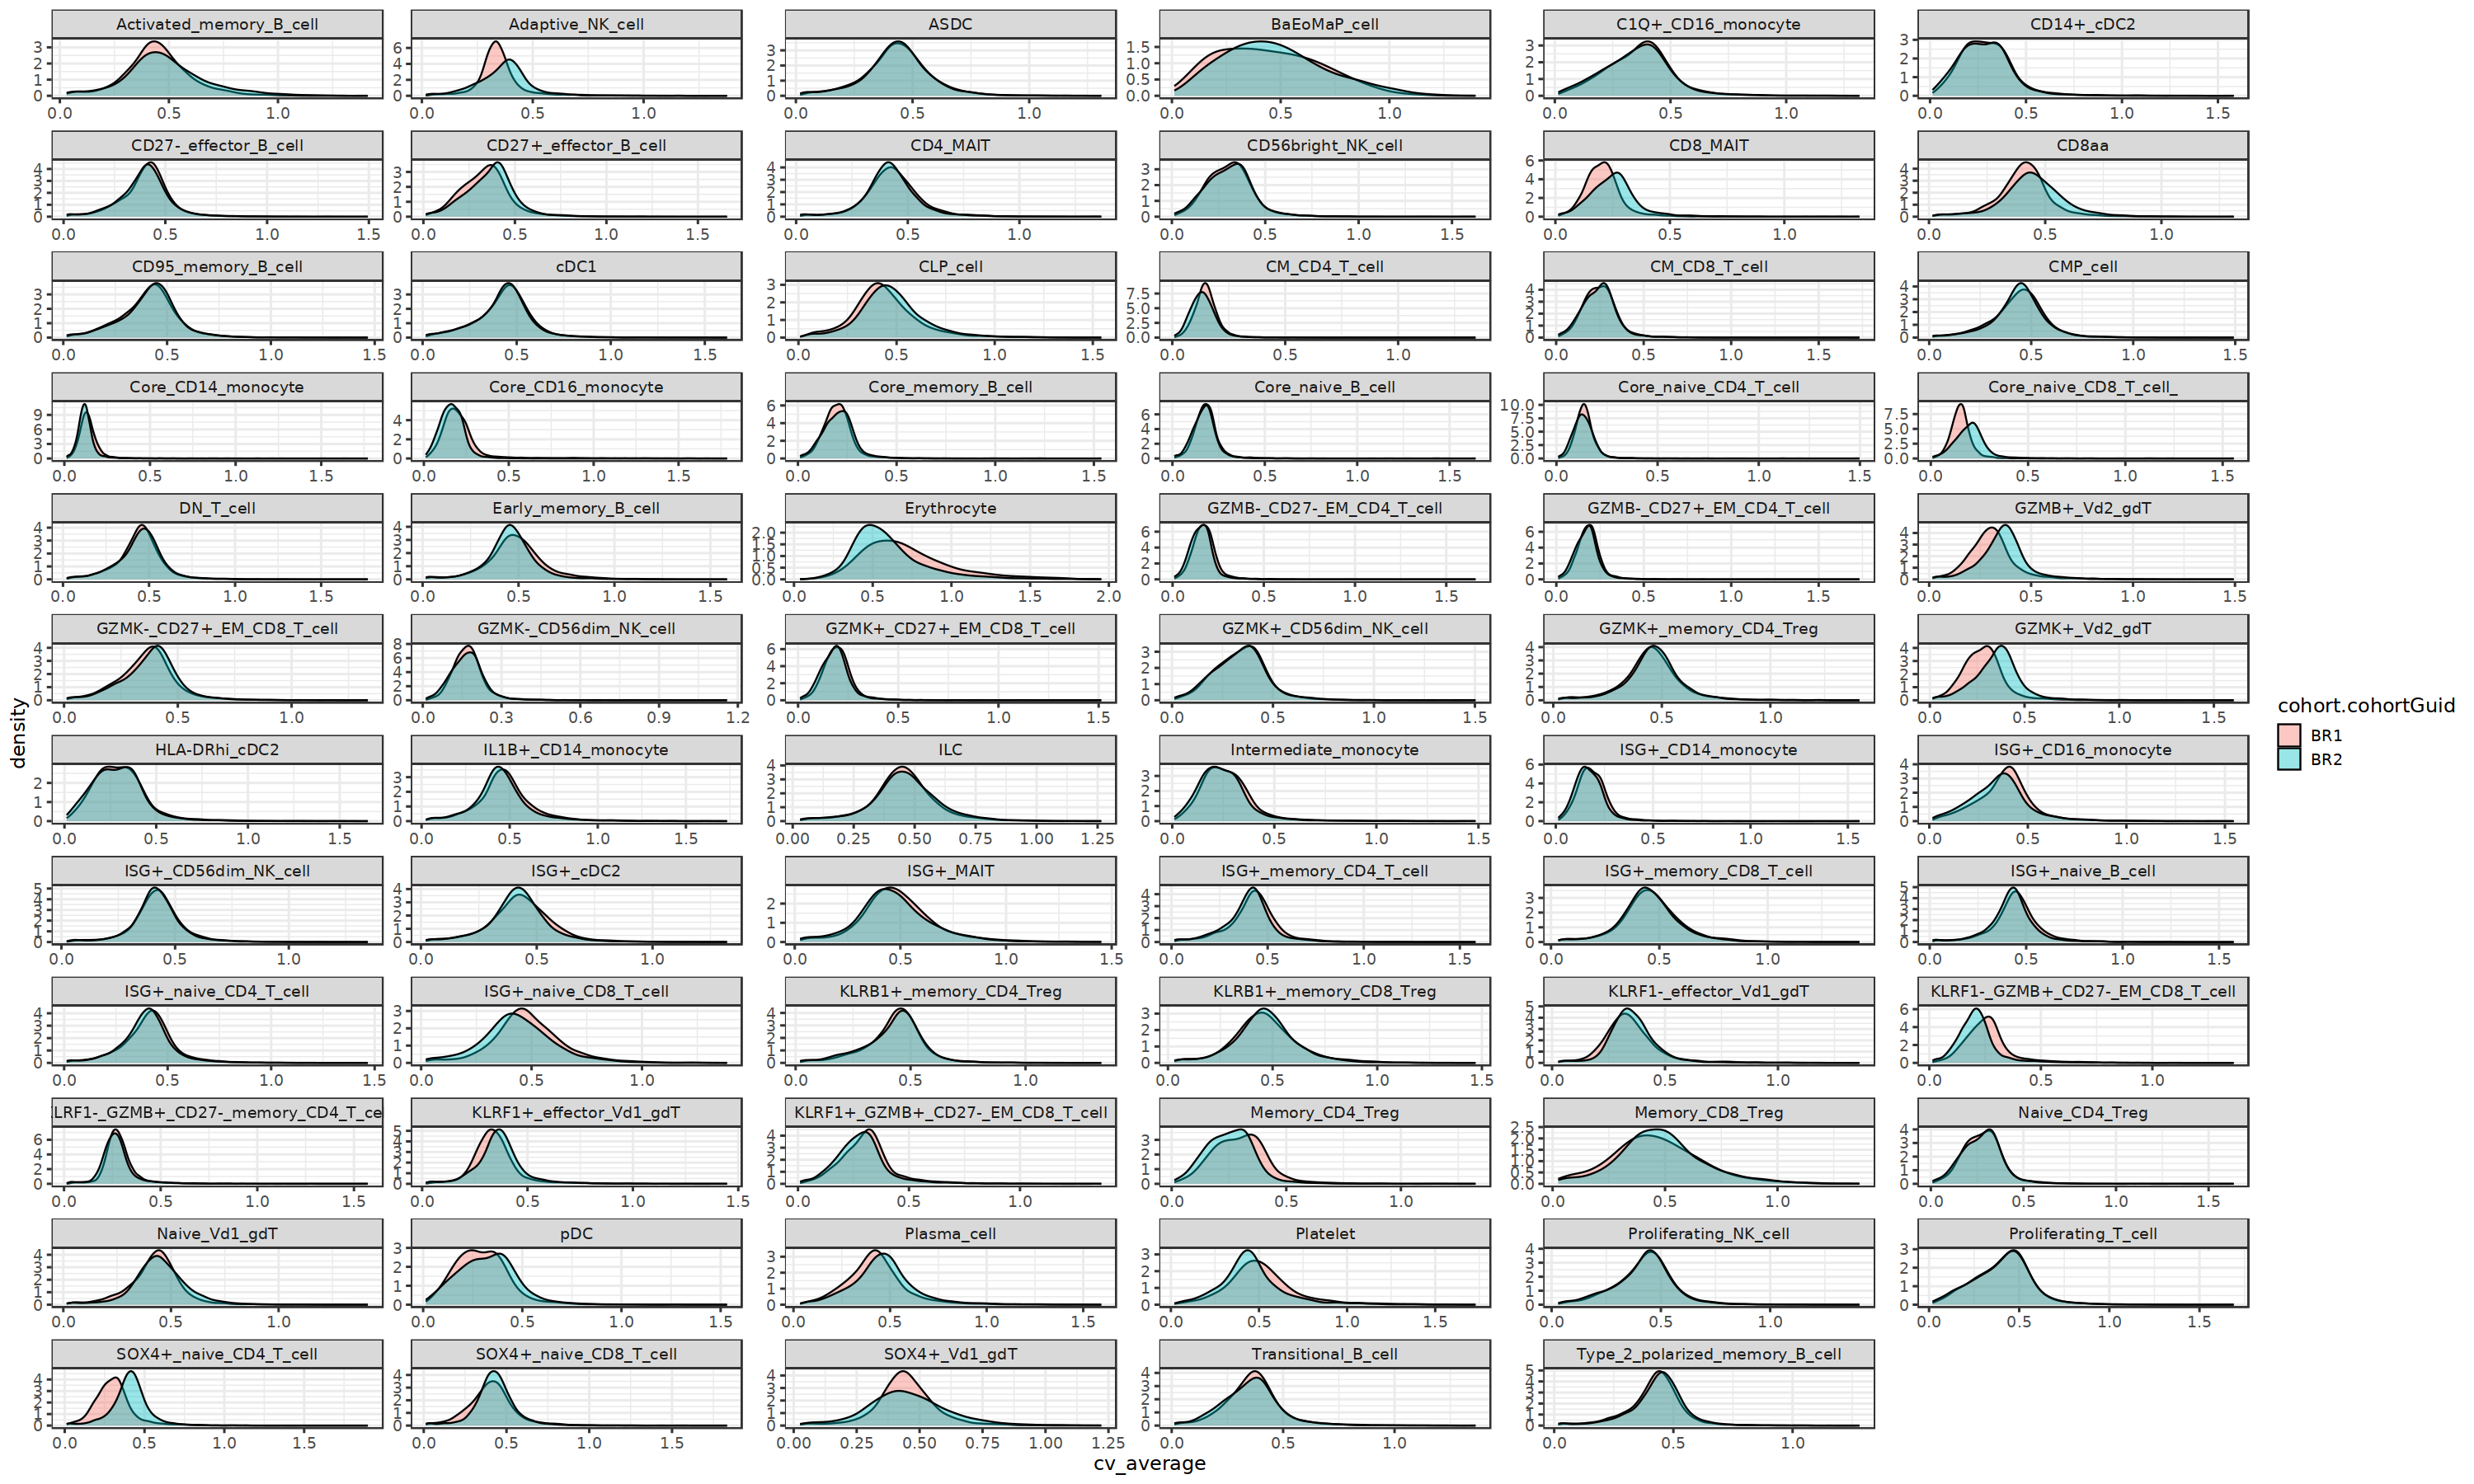

In [40]:
options(repr.plot.width = 25, repr.plot.height = 15)
P<-ggplot(data=df_all_averge, aes(x=cv_average,group=cohort.cohortGuid, fill=cohort.cohortGuid)) +
    geom_density(adjust=1.5, alpha=.4) +
    theme_bw(base_size=14)+facet_wrap(~celltypes,ncol=6,scale='free')
P

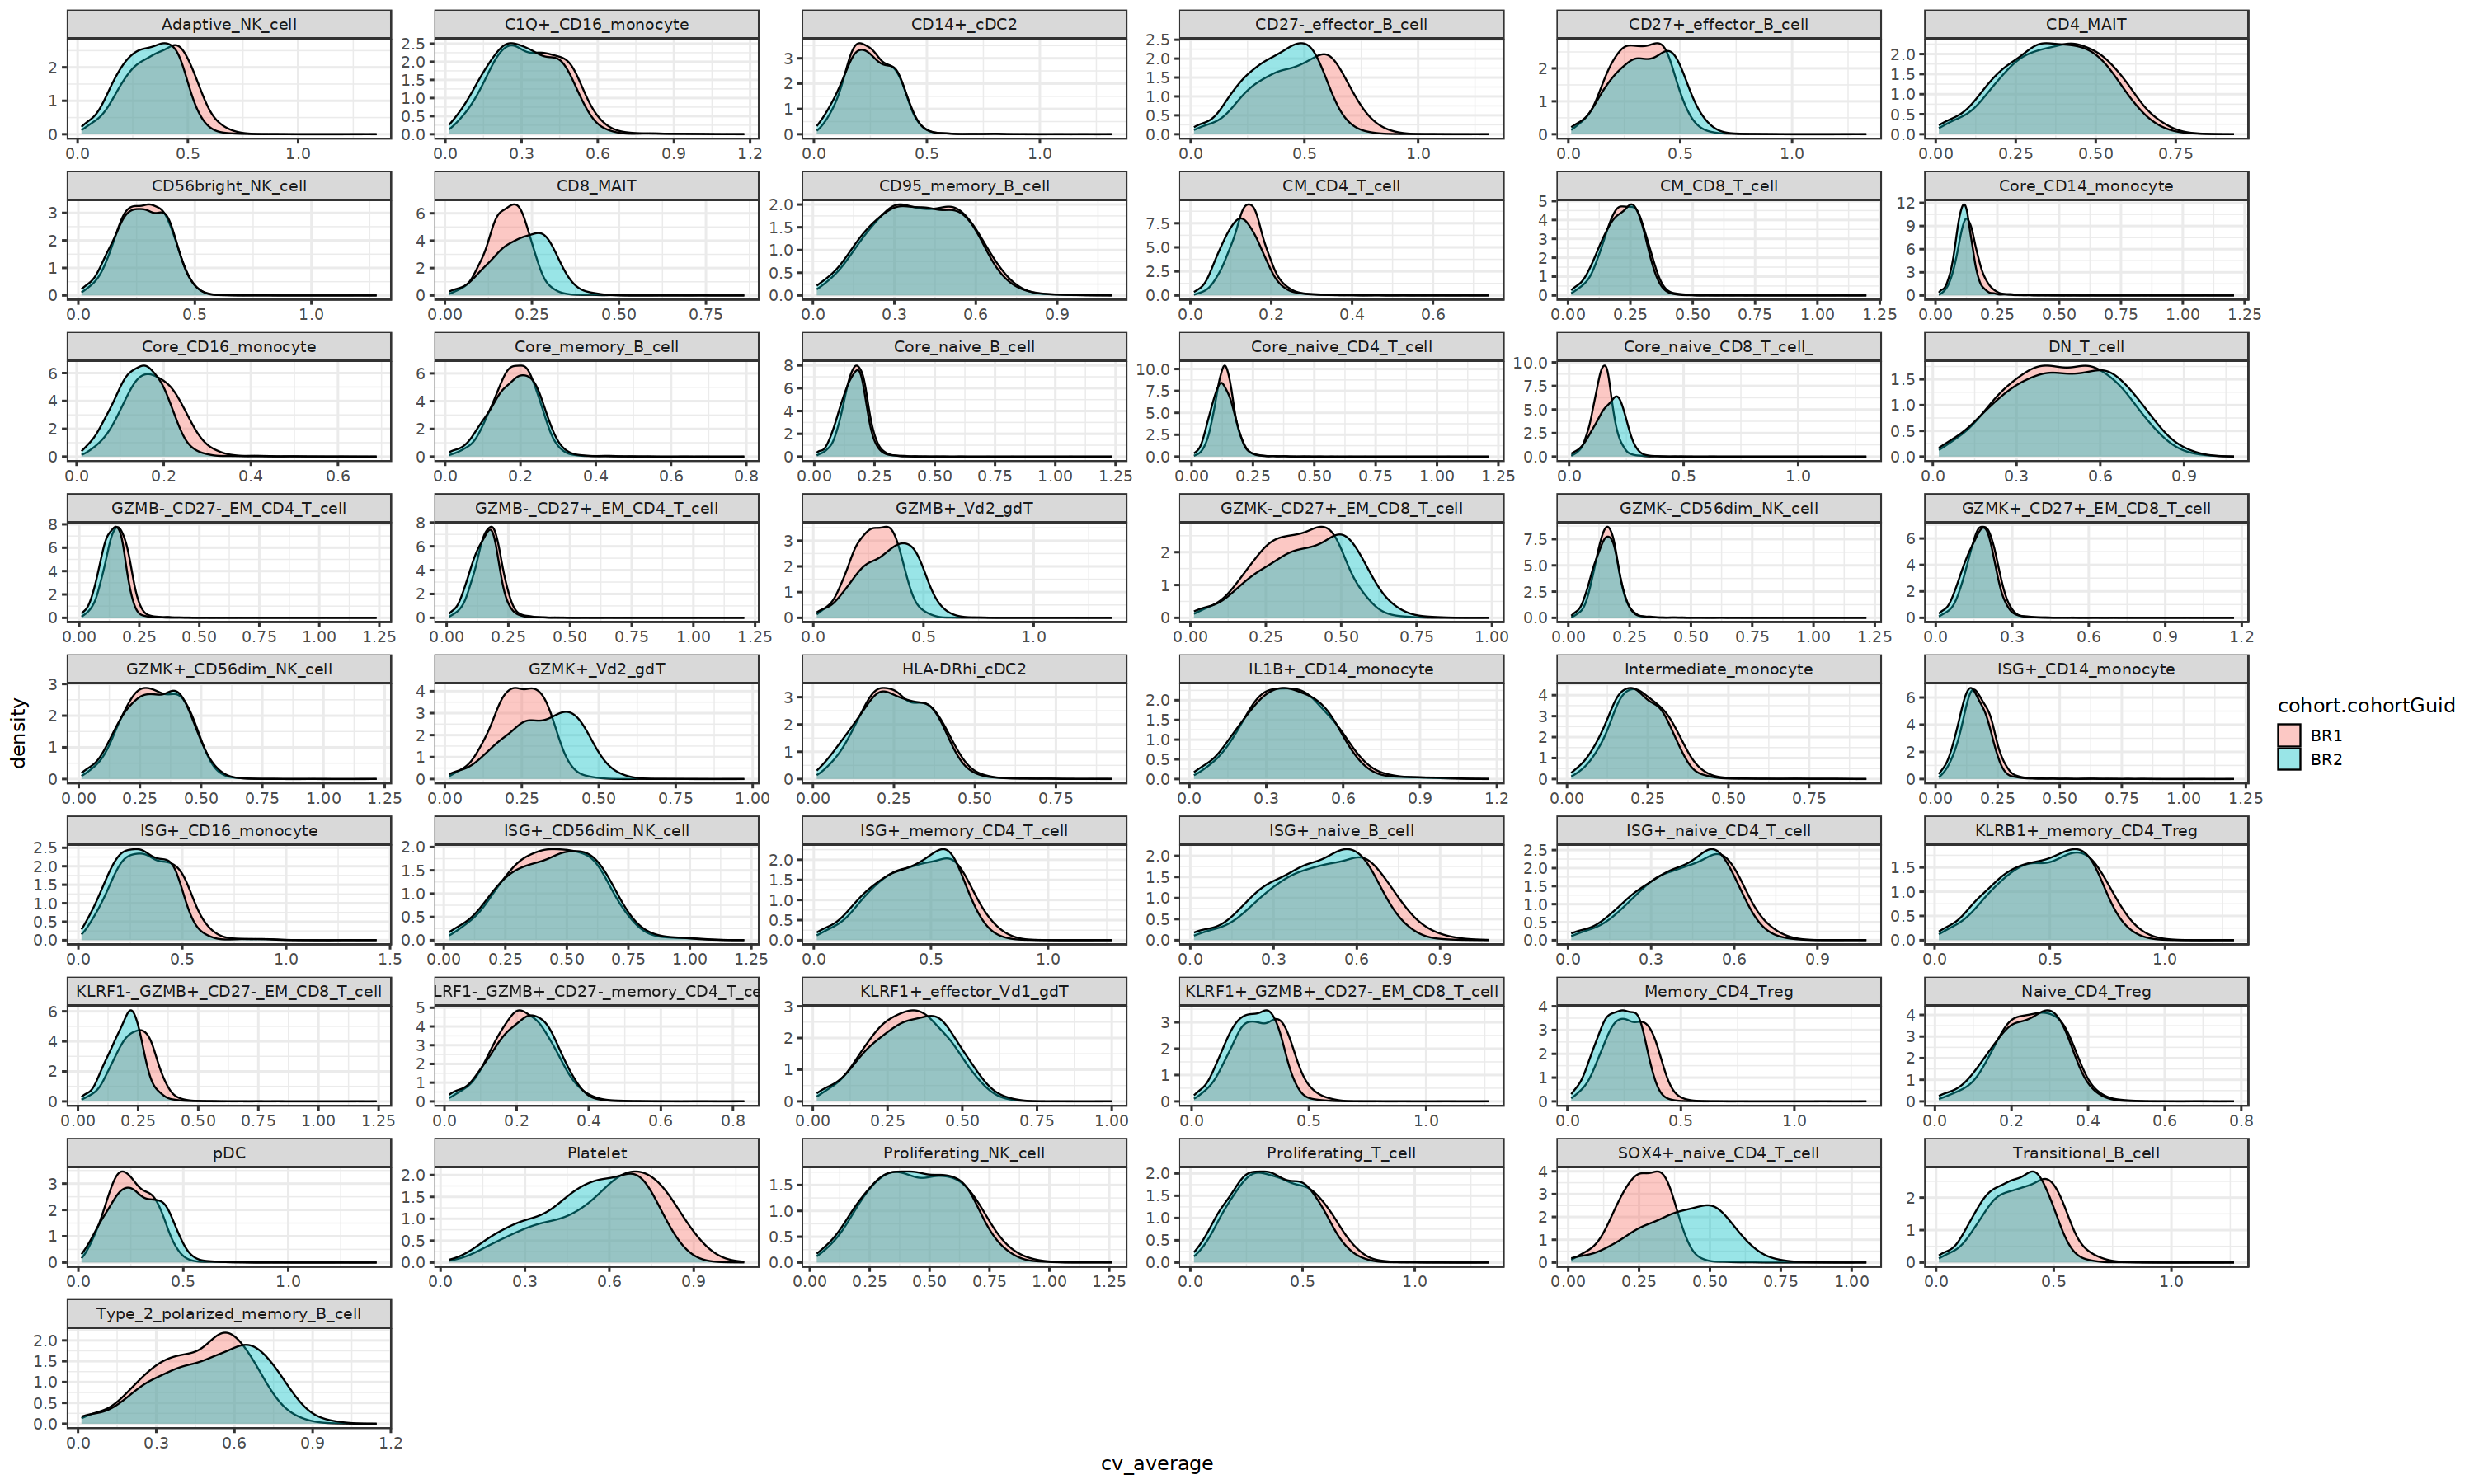

In [134]:
options(repr.plot.width = 25, repr.plot.height = 15)
P<-ggplot(data=df_all_averge, aes(x=cv_average,group=cohort.cohortGuid, fill=cohort.cohortGuid)) +
    geom_density(adjust=1.5, alpha=.4) +
    theme_bw(base_size=14)+facet_wrap(~celltypes,ncol=6,scale='free')
P

In [77]:
library(ggpubr)

`geom_smooth()` using formula = 'y ~ x'


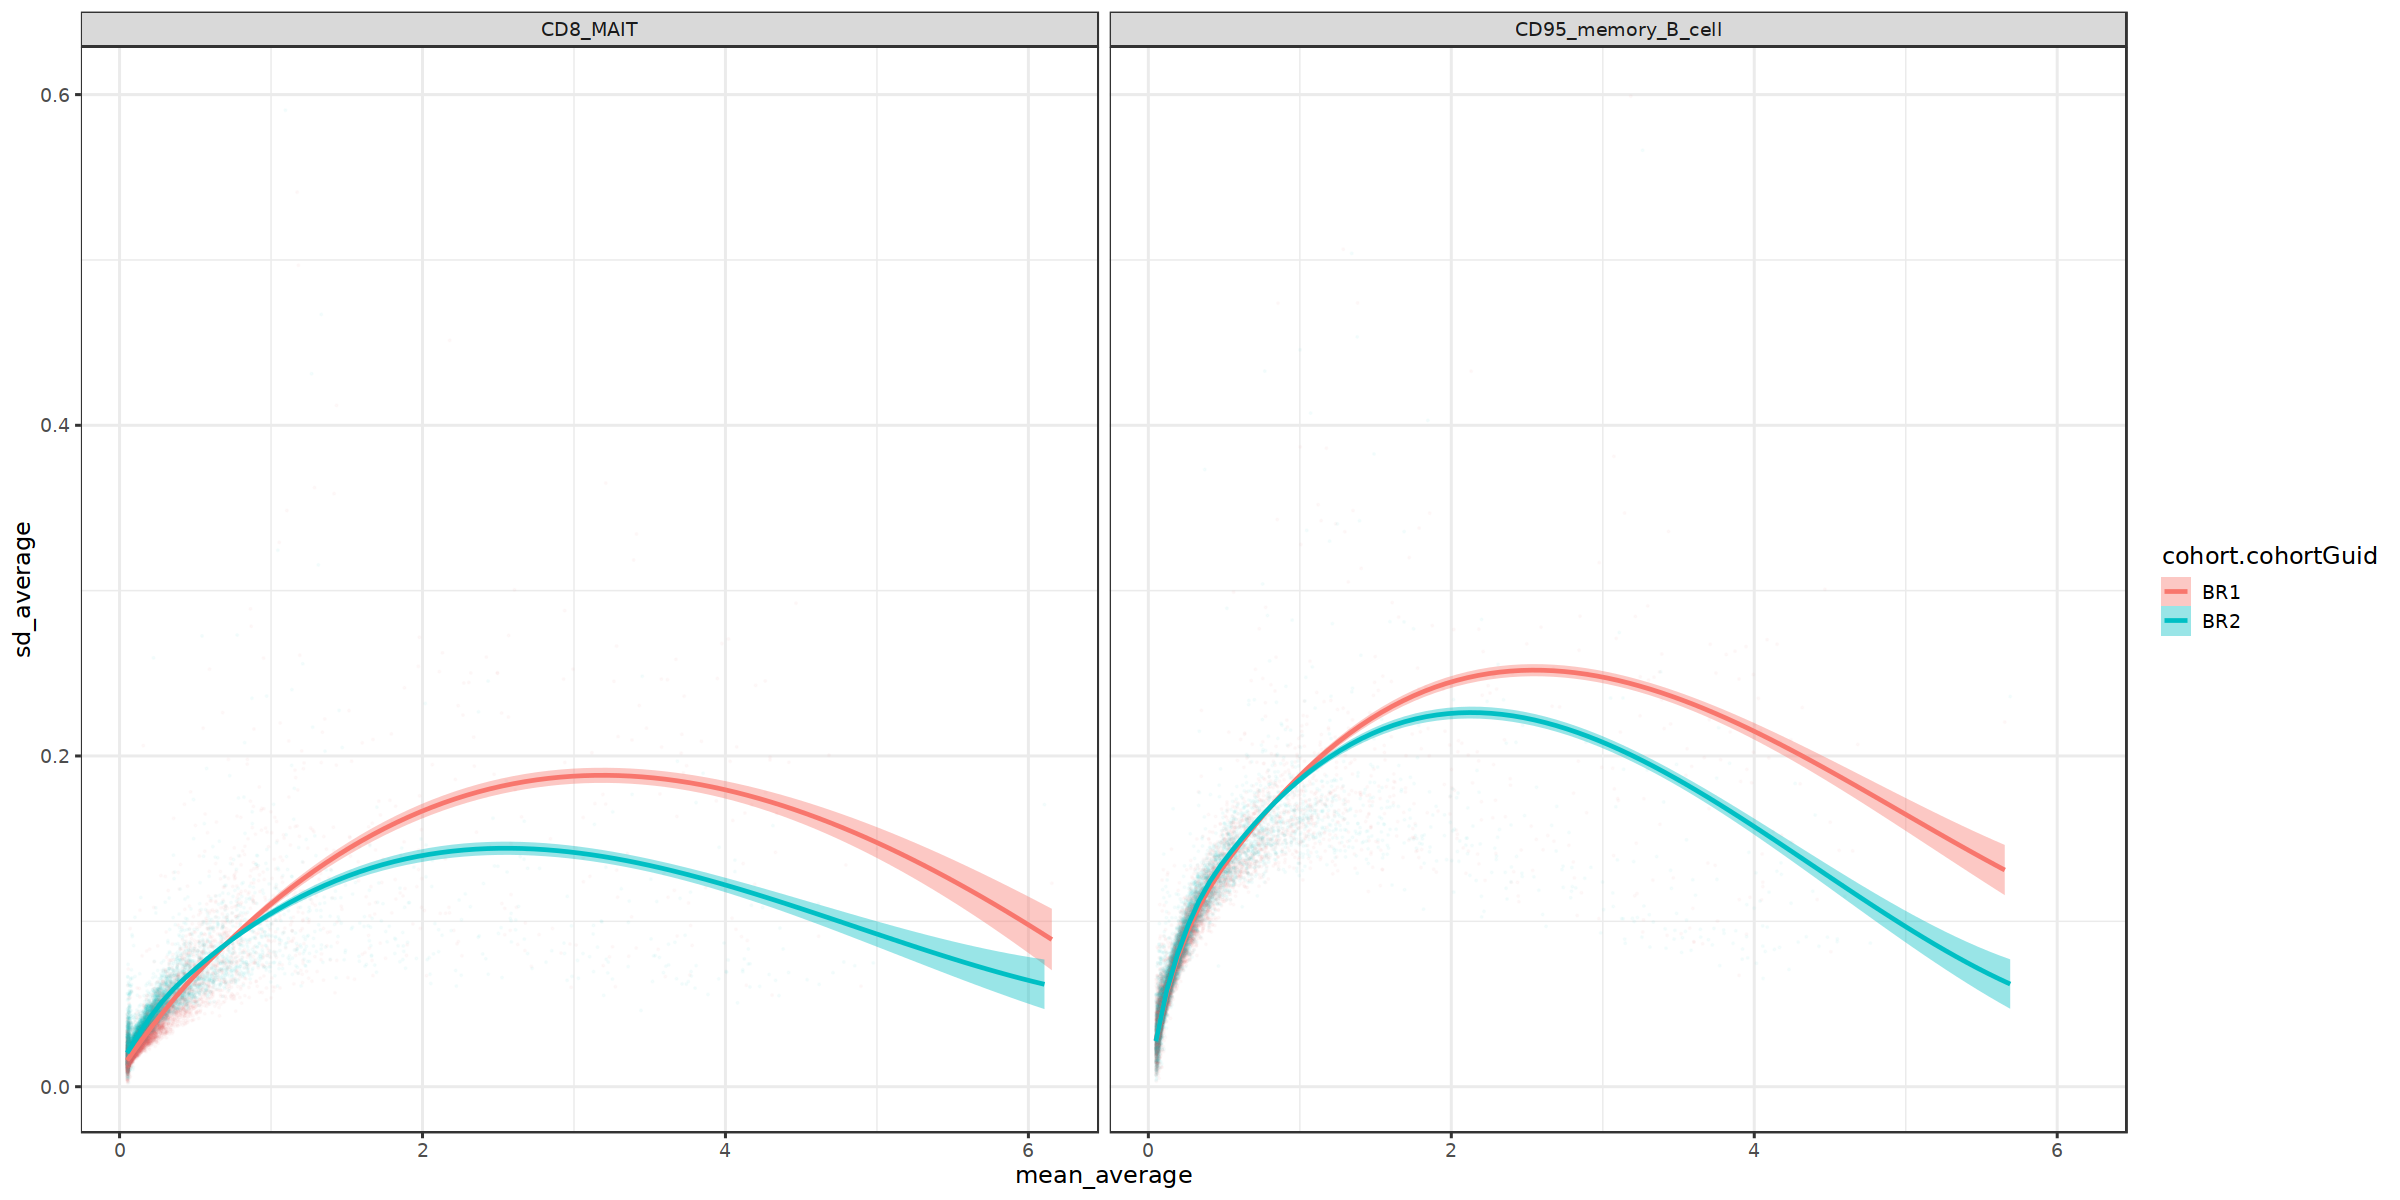

In [44]:
options(repr.plot.width = 20, repr.plot.height = 10)

p1<-ggplot(df_all_averge %>% filter(celltypes%in% c("CD8_MAIT",'CD95_memory_B_cell')), 
       aes(x=mean_average, 
           y=sd_average, 
            color=cohort.cohortGuid)) +
  geom_point(size=0.1,alpha=0.03) + theme_bw(base_size=14)+
  geom_smooth(method='loess', aes(fill=cohort.cohortGuid))+facet_wrap(~celltypes,ncol=12) 
p1

`geom_smooth()` using formula = 'y ~ x'


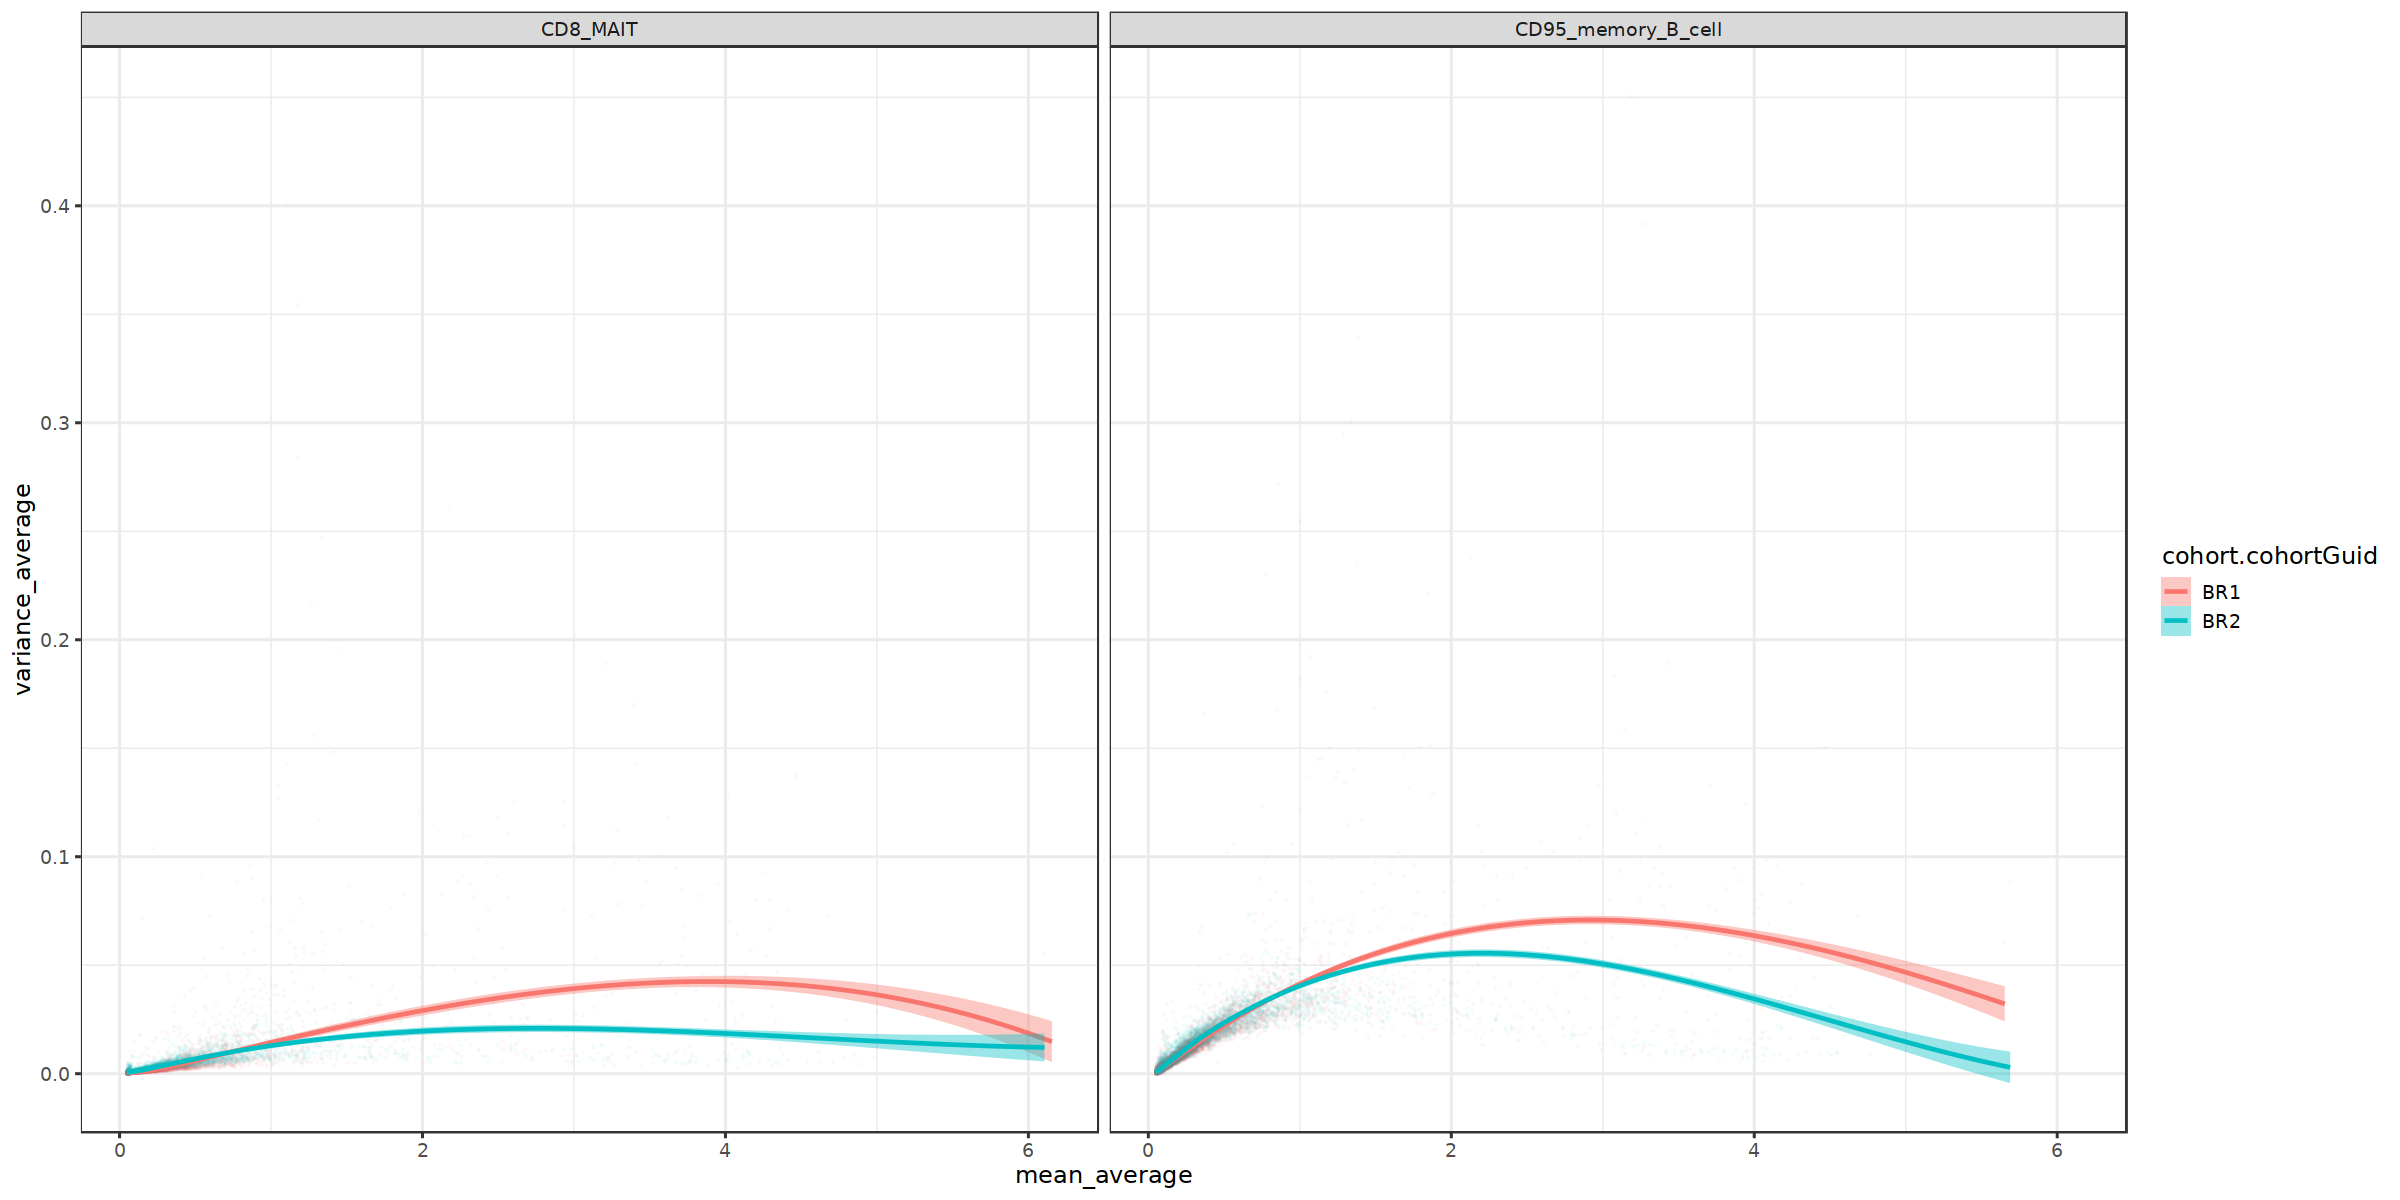

In [45]:
options(repr.plot.width = 20, repr.plot.height = 10)

p1<-ggplot(df_all_averge %>% filter(celltypes%in% c("CD8_MAIT",'CD95_memory_B_cell')), 
       aes(x=mean_average, 
           y=variance_average, 
            color=cohort.cohortGuid)) +
  geom_point(size=0.1,alpha=0.03) + theme_bw(base_size=14)+
  geom_smooth(method='loess', aes(fill=cohort.cohortGuid))+facet_wrap(~celltypes,ncol=12) 
p1

`geom_smooth()` using formula = 'y ~ x'


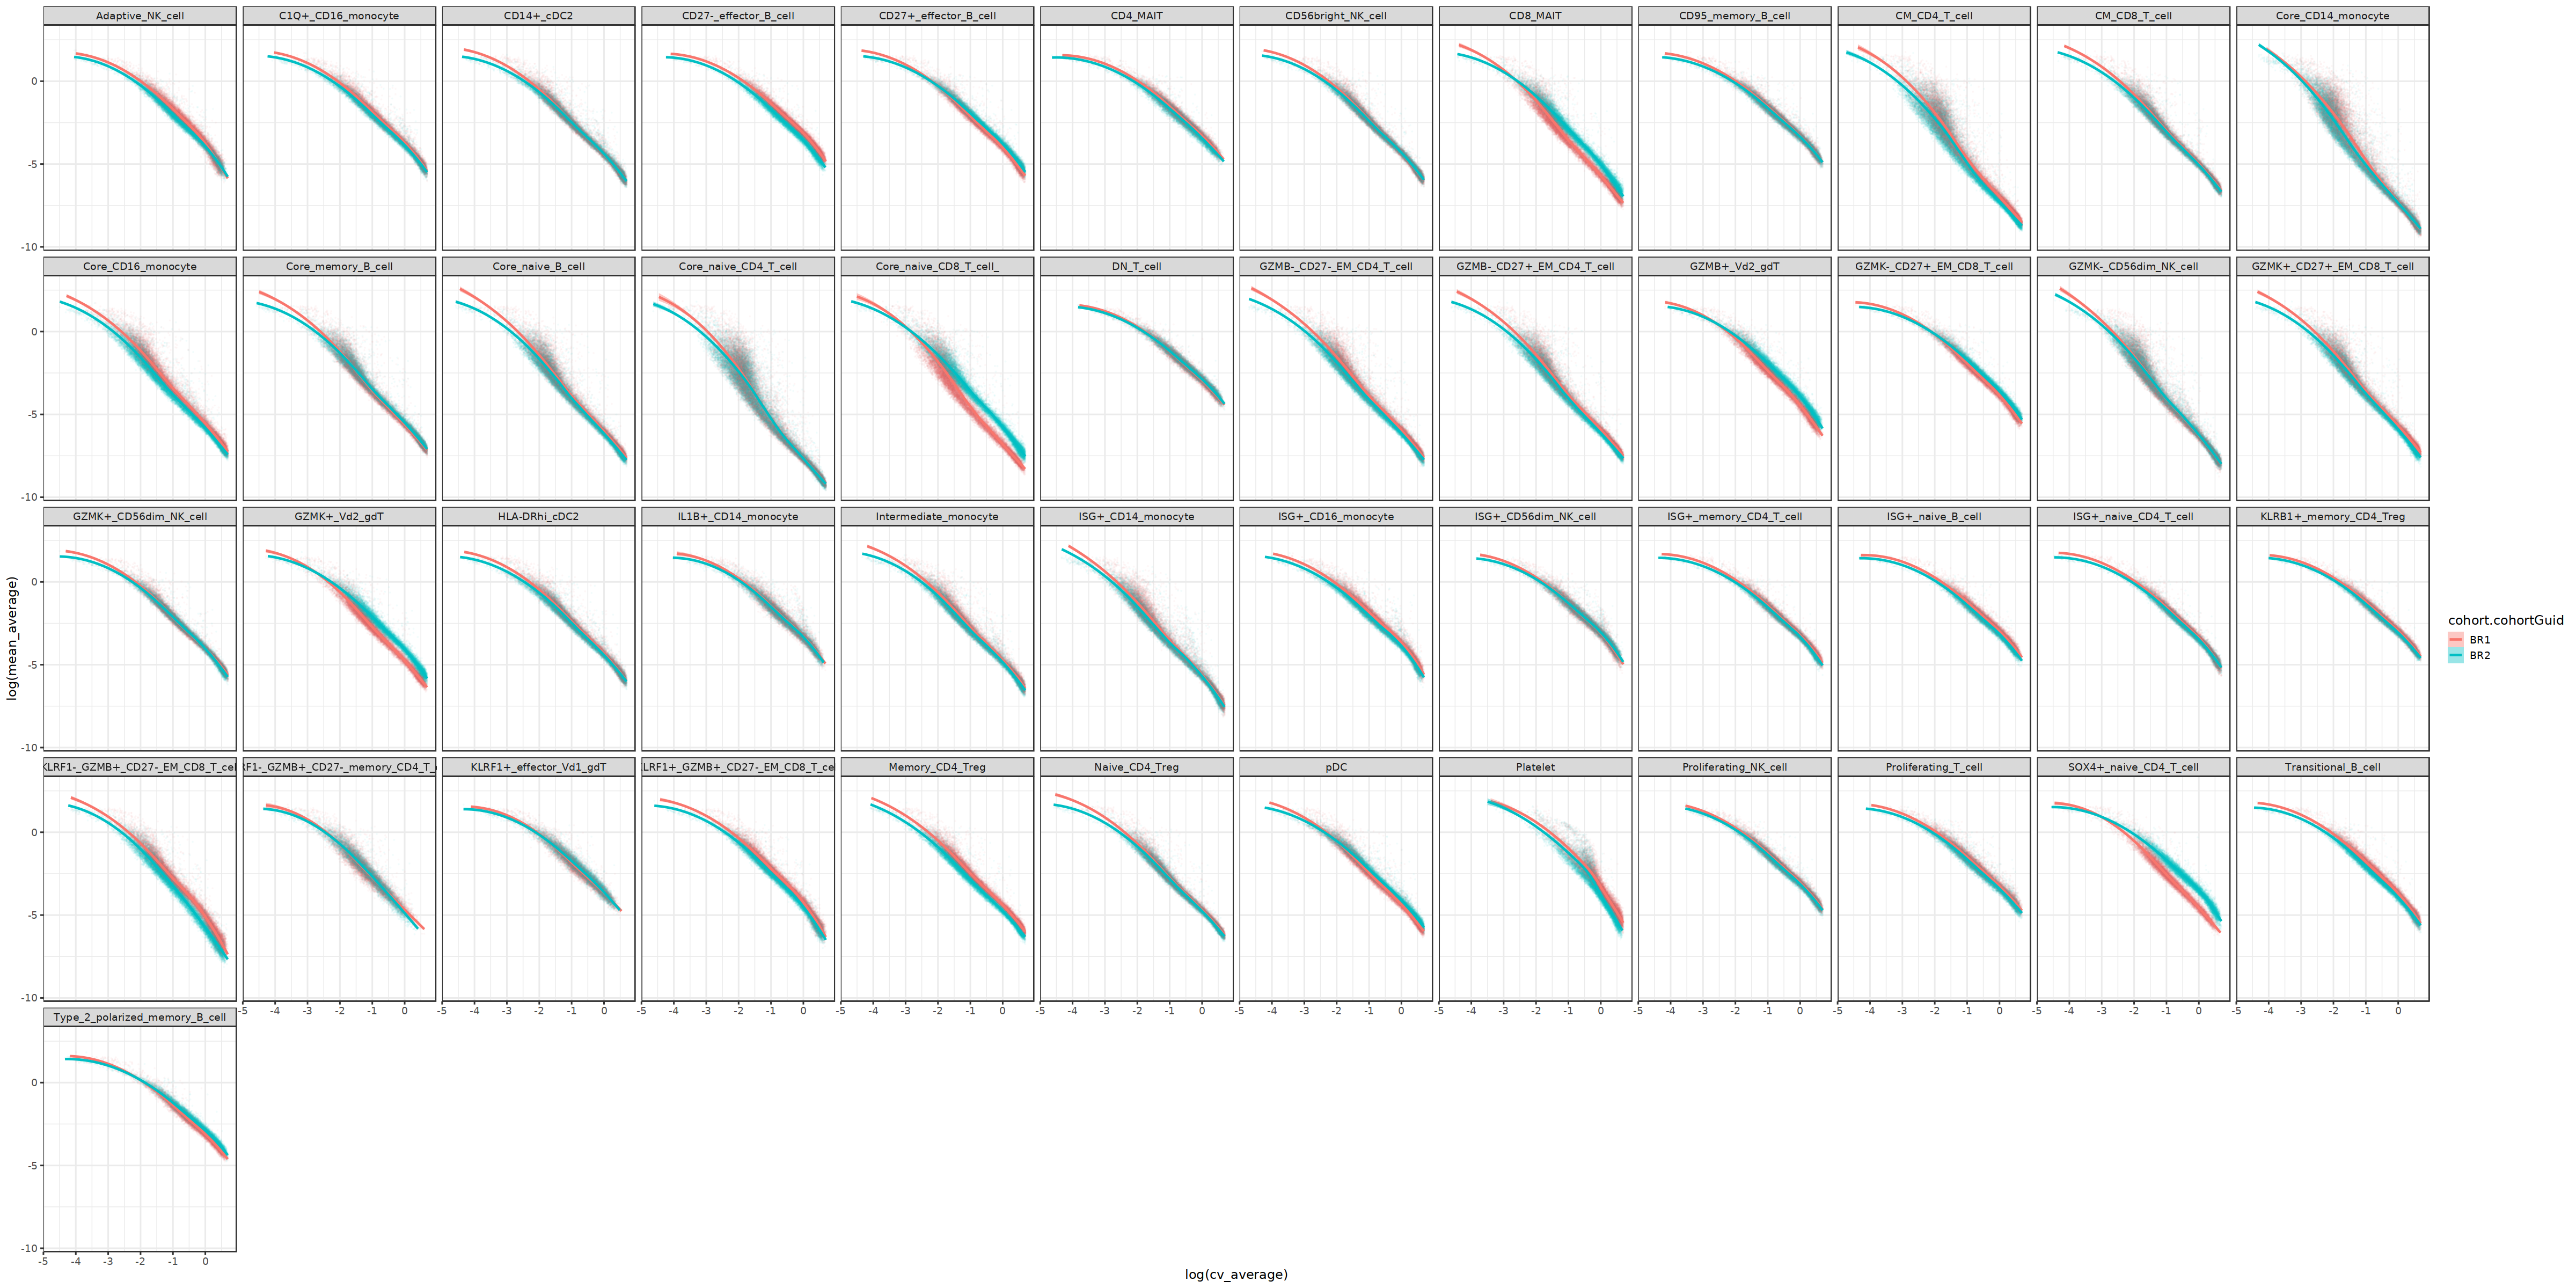

In [123]:
options(repr.plot.width = 40, repr.plot.height = 20)

p1<-ggplot(df_all_averge,#%>% filter(celltypes%in% c("CD8_MAIT",'CD95_memory_B_cell')), 
       aes(x=log(cv_average), 
           y=log(mean_average), 
            color=cohort.cohortGuid)) +
  geom_point(size=0.1,alpha=0.03) + theme_bw(base_size=14)+
  geom_smooth(method='loess', aes(fill=cohort.cohortGuid))+facet_wrap(~celltypes,ncol=12) 
p1

# Pathway analysis

In [197]:
df_all_averge %>% filter(celltypes=="Core_naive_CD4_T_cell",X=='COX5B')

celltypes             X     cohort.cohortGuid cv_average mean_average
1 Core_naive_CD4_T_cell COX5B BR1               0.15499868 0.9261605   
2 Core_naive_CD4_T_cell COX5B BR2               0.03597609 0.9956667

In [198]:
head(df_all_averge)

celltypes        X       cohort.cohortGuid cv_average mean_average
1 Adaptive_NK_cell A1BG    BR1               0.6443648  0.09755206  
2 Adaptive_NK_cell A1BG    BR2               0.4218518  0.08978024  
3 Adaptive_NK_cell A2M-AS1 BR1               0.4832482  0.12712848  
4 Adaptive_NK_cell A2M-AS1 BR2               0.3976931  0.11833863  
5 Adaptive_NK_cell AAAS    BR1               0.4101927  0.07096471  
6 Adaptive_NK_cell AAAS    BR2               0.5737097  0.06602669

In [182]:
log2(0.3976931/0.4832482)

[1] -0.2811088

In [181]:
head(cv_log2fc)

celltypes        X       log2fc    
1 Adaptive_NK_cell A1BG    -0.6111415
2 Adaptive_NK_cell A2M-AS1 -0.2811089
3 Adaptive_NK_cell AAAS     0.4840192
4 Adaptive_NK_cell AAED1   -0.1907123
5 Adaptive_NK_cell AAGAB   -0.4677763
6 Adaptive_NK_cell AAK1    -0.5112714

In [150]:
cv_log2fc<- df_all_averge %>%
  group_by(celltypes, X) %>%
  filter(n() == 2) %>%
  arrange(celltypes, X, cohort.cohortGuid) %>%
  summarise(log2fc = log2(last(cv_average) / first(cv_average)))

`summarise()` has grouped output by 'celltypes'. You can override using the
`.groups` argument.


In [187]:
cv_log2fc_subset<-cv_log2fc %>% filter(celltypes=="Core_naive_CD4_T_cell") %>% arrange(desc(log2fc))

In [188]:
head(cv_log2fc_subset)

celltypes             X        log2fc   
1 Core_naive_CD4_T_cell YBX3     1.0610177
2 Core_naive_CD4_T_cell SLC25A37 0.7868618
3 Core_naive_CD4_T_cell MALAT1   0.6152585
4 Core_naive_CD4_T_cell SLC2A11  0.5946803
5 Core_naive_CD4_T_cell FCF1     0.5941504
6 Core_naive_CD4_T_cell SAMD1    0.5832783

In [189]:
tail(cv_log2fc_subset)

celltypes             X        log2fc   
1 Core_naive_CD4_T_cell NDUFS5   -2.019838
2 Core_naive_CD4_T_cell SNRPD2   -2.032435
3 Core_naive_CD4_T_cell RPS15    -2.054355
4 Core_naive_CD4_T_cell RPS25    -2.101865
5 Core_naive_CD4_T_cell C12orf57 -2.105237
6 Core_naive_CD4_T_cell COX5B    -2.107146

In [190]:
library(fgsea)

In [191]:
pathways_database <- gmtPathways('c2.cp.v7.2.symbols.gmt')


In [192]:
fgsea_input<-deframe(cv_log2fc_subset[c('X','log2fc')])

In [193]:
fgseaResults <- fgsea(pathways =pathways_database ,
                      stats = fgsea_input,
                      minSize = 15,
                      maxSize = 500,
                      nperm = 1000)

Warning message in fgsea(pathways = pathways_database, stats = fgsea_input, minSize = 15, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in fgseaSimple(pathways = pathways, stats = stats, minSize = minSize, :
“There were 4 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic values”


In [196]:
tail(fgsea_input)

NDUFS5    SNRPD2     RPS15     RPS25  C12orf57     COX5B 
-2.019838 -2.032435 -2.054355 -2.101865 -2.105237 -2.107146

In [194]:
fgseaResults %>% filter(padj<0.05) %>% arrange(padj)

pathway                                                                                                                   
1   KEGG_OXIDATIVE_PHOSPHORYLATION                                                                                            
2   KEGG_PYRUVATE_METABOLISM                                                                                                  
3   KEGG_RIBOSOME                                                                                                             
4   KEGG_CARDIAC_MUSCLE_CONTRACTION                                                                                           
5   KEGG_ALZHEIMERS_DISEASE                                                                                                   
6   KEGG_PARKINSONS_DISEASE                                                                                                   
7   KEGG_HUNTINGTONS_DISEASE                                                                                                  
8   PID_HIF1A_PATHWAY                                                                                                         
9   REACTOME_RECOGNITION_OF_DNA_DAMAGE_BY_PCNA_CONTAINING_REPLICATION_COMPLEX                                                 
10  REACTOME_CELLULAR_RESPONSE_TO_HYPOXIA                                                                                     
11  REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION                                                                            
12  REACTOME_DEVELOPMENTAL_BIOLOGY                                                                                            
13  REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT                                                                                     
14  REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT                                                     
15  REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION                                                                                
16  REACTOME_MITOCHONDRIAL_BIOGENESIS                                                                                         
17  REACTOME_HOST_INTERACTIONS_OF_HIV_FACTORS                                                                                 
18  REACTOME_RESPIRATORY_ELECTRON_TRANSPORT_ATP_SYNTHESIS_BY_CHEMIOSMOTIC_COUPLING_AND_HEAT_PRODUCTION_BY_UNCOUPLING_PROTEINS_
19  REACTOME_FORMATION_OF_ATP_BY_CHEMIOSMOTIC_COUPLING                                                                        
20  REACTOME_INFLUENZA_INFECTION                                                                                              
21  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE                                                      
22  REACTOME_SCF_SKP2_MEDIATED_DEGRADATION_OF_P27_P21                                                                         
23  REACTOME_SIGNALING_BY_NOTCH2                                                                                              
24  REACTOME_ACTIVATED_NOTCH1_TRANSMITS_SIGNAL_TO_THE_NUCLEUS                                                                 
25  REACTOME_TGF_BETA_RECEPTOR_SIGNALING_ACTIVATES_SMADS                                                                      
26  REACTOME_SELENOAMINO_ACID_METABOLISM                                                                                      
27  REACTOME_SIGNALING_BY_ROBO_RECEPTORS                                                                                      
28  REACTOME_AUF1_HNRNP_D0_BINDS_AND_DESTABILIZES_MRNA                                                                        
29  REACTOME_MITOTIC_G1_PHASE_AND_G1_S_TRANSITION                                                                             
30  REACTOME_ASYMMETRIC_LOCALIZATION_OF_PCP_PROTEINS                                                                          
⋮   ⋮                                                              